# Step 1 - Importing our data
Importing the data we are going to use. In our case the data is placed in multiple .csv-files based on each individual city zip_code. We iterate over each city in the list and reads the corresponding .CSV file using pd.read_csv. The 'City' column of each DataFrame is assigned the integer value of the city code. The DataFrames are then appended to the dataframes list.

In [17]:

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import os
import pickle


cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950','3000','3460']
energy_classes = ['A2020', 'A2015', 'A2010', 'B', 'C', 'D', 'E', 'F', 'G']
types = ['Villa','Ejerlejlighed','Rækkehus','Villalejlighed']

dataframes = []

for city in cities:
    filename = f'../data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df['City'] = city  # Adding the city column
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)  

# Removing rows with Type being "Landeejendom"
combined_df = combined_df[combined_df['Type'] != 'Landejendom']


# Step 2 - Data processing
Any rows containing missing values are dropped using data.dropna(inplace=True)

In [18]:
# removing any rows with missing data
combined_df = combined_df.dropna()

# Step 3 - Feauture Selection
The first line of code uses the get_dummies() function from the pandas library to perform "one-hot encoding" on the columns 'City', 'Energy class', and 'Type' in the combined_df dataframe, which is done on non-numeric values for the machine model to understand. Then we normalize the values of ‘Size’ within a certain range. Selecting the relevant features (variables) that we want to use for predicting the price. We exclude any columns that are not useful or not available during prediction.

In [19]:
combined_df = pd.get_dummies(combined_df, columns=['City', 'Energy class', 'Type'])

scaler = StandardScaler()
combined_df['Size'] = scaler.fit_transform(combined_df[['Size']])

# Splitting data in features (X) and target (y)
X = combined_df.drop(['Price','Squaremeter price', 'Address','Url'], axis=1)
y = combined_df['Price']

# Step 4 - Split the data
Spliting the data into training and testing sets to evaluate the performance of your machine learning model. The training set will be used to train the model, and the testing set will be used to evaluate its performance.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5 - Train a model
Using linear regression model and training the model on the training data. 
The 'data' DataFrame is split into training and testing sets using train_test_split above. The training set (X_train, y_train) will be used to train the model, while the testing set (X_test, y_test) will be used for evaluation.

In [21]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

# Saving the model for later use

In [22]:
model_filename = '../models/linear_model.pkl'

if os.path.exists(model_filename):
    os.remove(model_filename)

with open('../models/linear_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

# Step 6 - Evaluate the model

In [23]:
predictions = linear_model.predict(X_test)
print('R^2 score: ', r2_score(y_test, predictions))
print('RMSE: ', mean_squared_error(y_test, predictions, squared=False))

R^2 score:  0.7470507602966174
RMSE:  3078310.67965753


# Visualizations

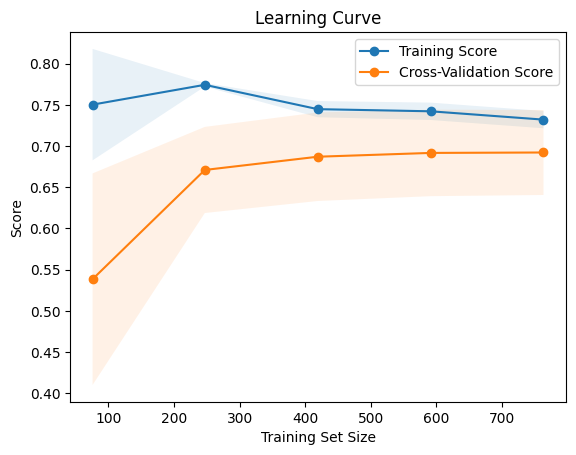

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculating the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(linear_model, X_train, y_train, cv=5)

# Calculating the mean and standard deviation of the scores using numpy
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()